Importing necessary Libraries and Loadnig dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallamahgoub/diabetes")

print("Path to dataset files:", path)

100%|██████████| 8.89k/8.89k [00:00<00:00, 12.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abdallamahgoub/diabetes/versions/1


In [ ]:
import os
print(os.listdir(path))

['diabetes.csv']


In [ ]:
df = pd.read_csv(path +'/diabetes.csv')

In [ ]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


Data Preprocessing

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
Pedigree,0
Age,0
Outcome,0


In [ ]:
X = df.drop('Outcome',axis=1)

In [ ]:
y = df['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
df['BloodPressure'] = sc.fit_transform(df['BloodPressure'].values.reshape(-1, 1))

In [ ]:
df['BMI'] = sc.fit_transform(df['BMI'].values.reshape(-1, 1))

In [ ]:
df['SkinThickness'] = sc.fit_transform(df['SkinThickness'].values.reshape(-1, 1))

In [ ]:
df['Glucose'] = sc.fit_transform(df['Glucose'].values.reshape(-1, 1))

In [ ]:
df['Age'] = sc.fit_transform(df['Age'].values.reshape(-1, 1))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)

Model Training

In [ ]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = KNN.predict(x_test)

Model Testing and Evaluation





In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

Accuracy : 0.6493506493506493


In [ ]:
import matplotlib.pyplot as plt

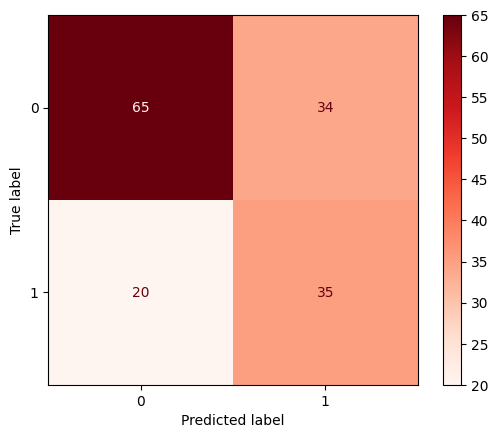

In [ ]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71        99
           1       0.51      0.64      0.56        55

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.65      0.66       154

